<a href="https://colab.research.google.com/github/ich-20211101/appliedMultivariateStatisticalAnalysis/blob/main/Class%202%20-%20Exercise%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/ich-20211101/appliedMultivariateStatisticalAnalysis/refs/heads/main/college.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [14]:
correlation_matrix = df[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc']].corr()
correlation_matrix

,Apps,Accept,Enroll,Top10perc,Top25perc
Apps,1.000000,0.943451,0.846822,0.338834,0.351640
Accept,0.943451,1.000000,0.911637,0.192447,0.247476
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000


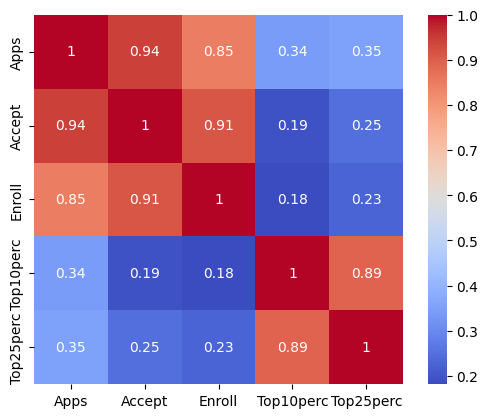

In [15]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

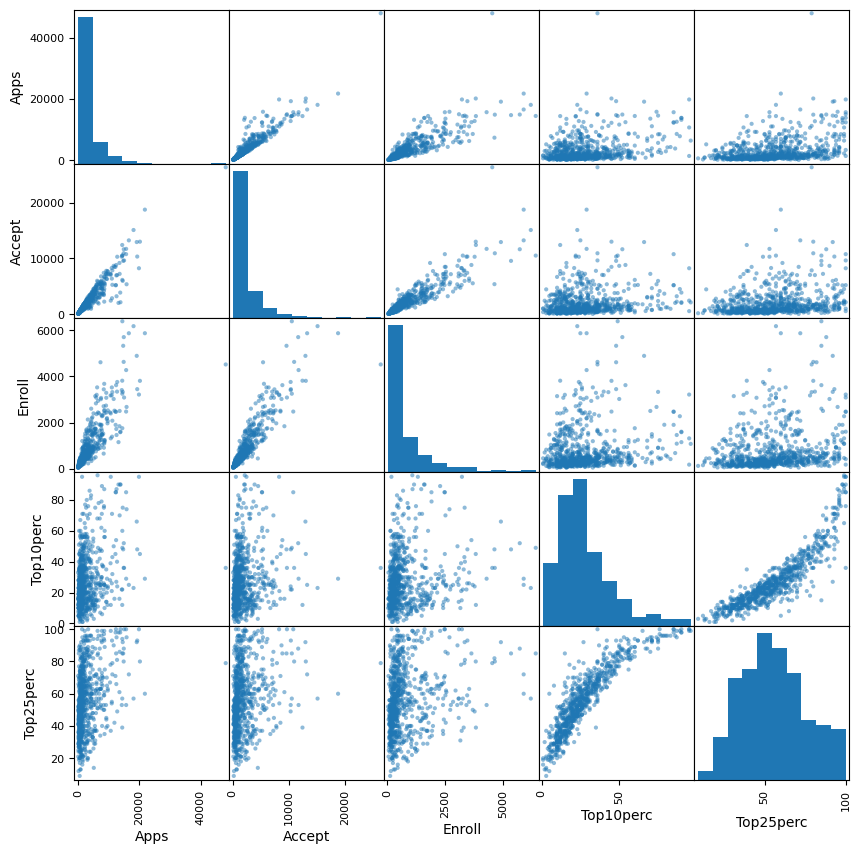

In [18]:
variables = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc']

# Create a scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(df[variables], figsize=(10, 10))

plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant

In [22]:
# X = add_constant(iris[['sepal_length', 'sepal_width', 'petal_length']])
X = df[['Apps', 'Top10perc']]

# Create the target variable
y = df['Enroll']

# Fit a linear regression model
model = OLS(y, X).fit()

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

    Variable       VIF
0       Apps  1.774765
1  Top10perc  1.774765


In [23]:
X = df[['Apps', 'Top10perc']]
X = sm.add_constant(X)  # Add a constant term to the features
y = df['Enroll']

# Fit the multivariate regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Enroll   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1045.
Date:                Fri, 16 May 2025   Prob (F-statistic):          1.30e-220
Time:                        01:16:10   Log-Likelihood:                -5904.0
No. Observations:                 777   AIC:                         1.181e+04
Df Residuals:                     774   BIC:                         1.183e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.8057     32.521      9.649      0.0

In [31]:
col_names = ['Unnamed',
             'Private',
             'Apps',
             'Accept',
             'Enroll',
             'Top10perc',
             'Top25perc',
             'F.Undergrad',
             'P.Undergrad',
             'Outstate',
             'Room.Board',
             'Books',
             'Personal',
             'PhD',
             'Terminal',
             'S.F.Ratio',
             'perc.alumni',
             'Expend',
             'Grad.Rate']

In [28]:
print(len(df.columns))

19


In [33]:
df.columns = col_names
data2 = df[['Private', 'Expend', 'Grad.Rate']]
data2

,Private,Expend,Grad.Rate
0,Yes,7041,60
1,Yes,10527,56
2,Yes,8735,54
3,Yes,19016,59
4,Yes,10922,15
...,...,...,...
772,No,4469,40
773,Yes,9189,83
774,Yes,8323,49
775,Yes,40386,99


In [36]:
one_hot_encoded = pd.get_dummies(data2['Private'], prefix='race')

# Concatenate the one-hot encoded columns with the original DataFrame
private_encoded = pd.concat([data2, one_hot_encoded], axis=1)

# Drop the original 'race' column
private_encoded.drop('Private', axis=1, inplace=True)

# Display the encoded DataFrame
private_encoded

,Expend,Grad.Rate,race_No,race_Yes
0,7041,60,False,True
1,10527,56,False,True
2,8735,54,False,True
3,19016,59,False,True
4,10922,15,False,True
...,...,...,...,...
772,4469,40,True,False
773,9189,83,False,True
774,8323,49,False,True
775,40386,99,False,True
